# Problem Statement

Diabetes is a global health issue affecting 1 out of 10 people. It's a disease where the body doesn’t produce enough insulin or can't use insulin properly. The number of patients diagnosed with diabetes has seen a rise in recent years. It’s becoming a more common disease in our everyday lives. The goal of the model is to predict whether a patient is at risk of developing diabetes. Solving this problem would be beneficial for patients who are at risk of developing other diseases. It also prevents people from experiencing serious complications from the disease. This would be useful for doctors who have to treat patients. Some potential machine learning models that could be used are logistic regression, k-nearest neighbors, decision trees, and support vector machines. These models are suitable for this data because they can classify individuals with early signs of diabetes. Data-related challenges arise when dealing with these machine learning models. Since the data is from a hospital in Sylhet, Bangladesh, there could be bias in that demographic. The study is only collected from that population and nowhere else. Compared to other machine learning datasets, it’s considered small. Overfitting and noise could occur when using a small dataset. To ensure the model’s business usefulness, it should be a strong predictor of someone developing diabetes. It should also be able to be deployed anywhere and be effective in reducing severe cases of diabetes.

# Exploratory Data Analysis

**Data Description:**

The data came from UCI machine learning repository and is formatted as a CSV file. The number of samples in this data set is 520. There are a total of 16 features. Some column names are age, gender, polyuria, and weakness. The data type varies from integer, category, and binary.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip3 install -U ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

In [ ]:
diabetes = fetch_ucirepo(name="Early Stage Diabetes Risk Prediction")

In [ ]:
diabetes_df = diabetes.data.original

In [ ]:
#I'm dropping gender because I don't think it's the best factor in determining if someone
#is diabetic or not. I think age is a better factor.
diabetes_df.drop('gender', axis=1, inplace=True)

In [ ]:
diabetes_df.rename(columns={'class': 'target'}, inplace=True)
print(diabetes_df)

     age polyuria polydipsia sudden_weight_loss weakness polyphagia  \
0     40       No        Yes                 No      Yes         No   
1     58       No         No                 No      Yes         No   
2     41      Yes         No                 No      Yes        Yes   
3     45       No         No                Yes      Yes        Yes   
4     60      Yes        Yes                Yes      Yes        Yes   
..   ...      ...        ...                ...      ...        ...   
515   39      Yes        Yes                Yes       No        Yes   
516   48      Yes        Yes                Yes      Yes        Yes   
517   58      Yes        Yes                Yes      Yes        Yes   
518   32       No         No                 No      Yes         No   
519   42       No         No                 No       No         No   

    genital_thrush visual_blurring itching irritability delayed_healing  \
0               No              No     Yes           No             Yes 

In [ ]:
# I'm also converting the categorical data to numerical data so it's easier to analyze the data.
columns = ['polyuria','polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
                      'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                      'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'target']

for column in columns:
    diabetes_df[column] = diabetes_df[column].replace({'Yes': 1, 'No': 0,'Positive': 1, 'Negative': 0,})
print(diabetes_df)

     age  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0     40         0           1                   0         1           0   
1     58         0           0                   0         1           0   
2     41         1           0                   0         1           1   
3     45         0           0                   1         1           1   
4     60         1           1                   1         1           1   
..   ...       ...         ...                 ...       ...         ...   
515   39         1           1                   1         0           1   
516   48         1           1                   1         1           1   
517   58         1           1                   1         1           1   
518   32         0           0                   0         1           0   
519   42         0           0                   0         0           0   

     genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0      

<ipython-input-22-97d8bf399c4b>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diabetes_df[column] = diabetes_df[column].replace({'Yes': 1, 'No': 0,'Positive': 1, 'Negative': 0,})


In [ ]:
print(diabetes_df.head())

   age  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40         0           1                   0         1           0   
1   58         0           0                   0         1           0   
2   41         1           0                   0         1           1   
3   45         0           0                   1         1           1   
4   60         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopecia  obesity  target  
0                0  

In [ ]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   polyuria            520 non-null    int64
 2   polydipsia          520 non-null    int64
 3   sudden_weight_loss  520 non-null    int64
 4   weakness            520 non-null    int64
 5   polyphagia          520 non-null    int64
 6   genital_thrush      520 non-null    int64
 7   visual_blurring     520 non-null    int64
 8   itching             520 non-null    int64
 9   irritability        520 non-null    int64
 10  delayed_healing     520 non-null    int64
 11  partial_paresis     520 non-null    int64
 12  muscle_stiffness    520 non-null    int64
 13  alopecia            520 non-null    int64
 14  obesity             520 non-null    int64
 15  target              520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [ ]:
# The mean age is 48. This is interesting.
print(diabetes_df.describe())

              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

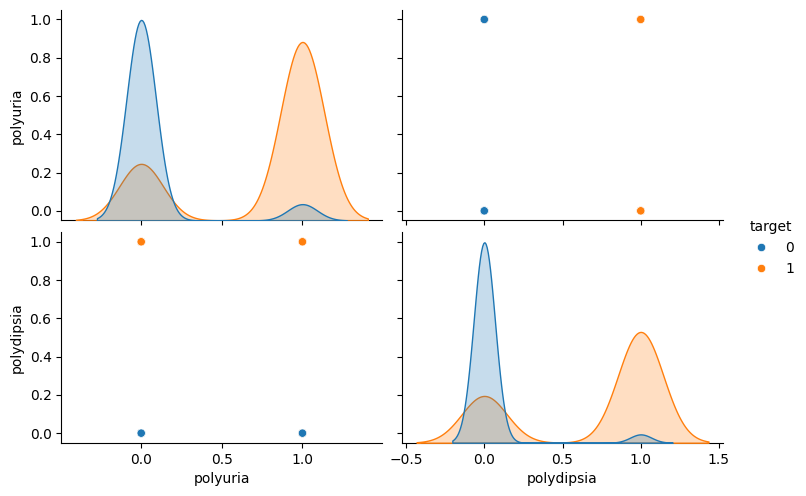

In [ ]:
#Exploring which one is more correlated with diabetes
sns.pairplot(diabetes_df[['polyuria', 'polydipsia', 'target']], hue='target', aspect=1.5)
plt.show()

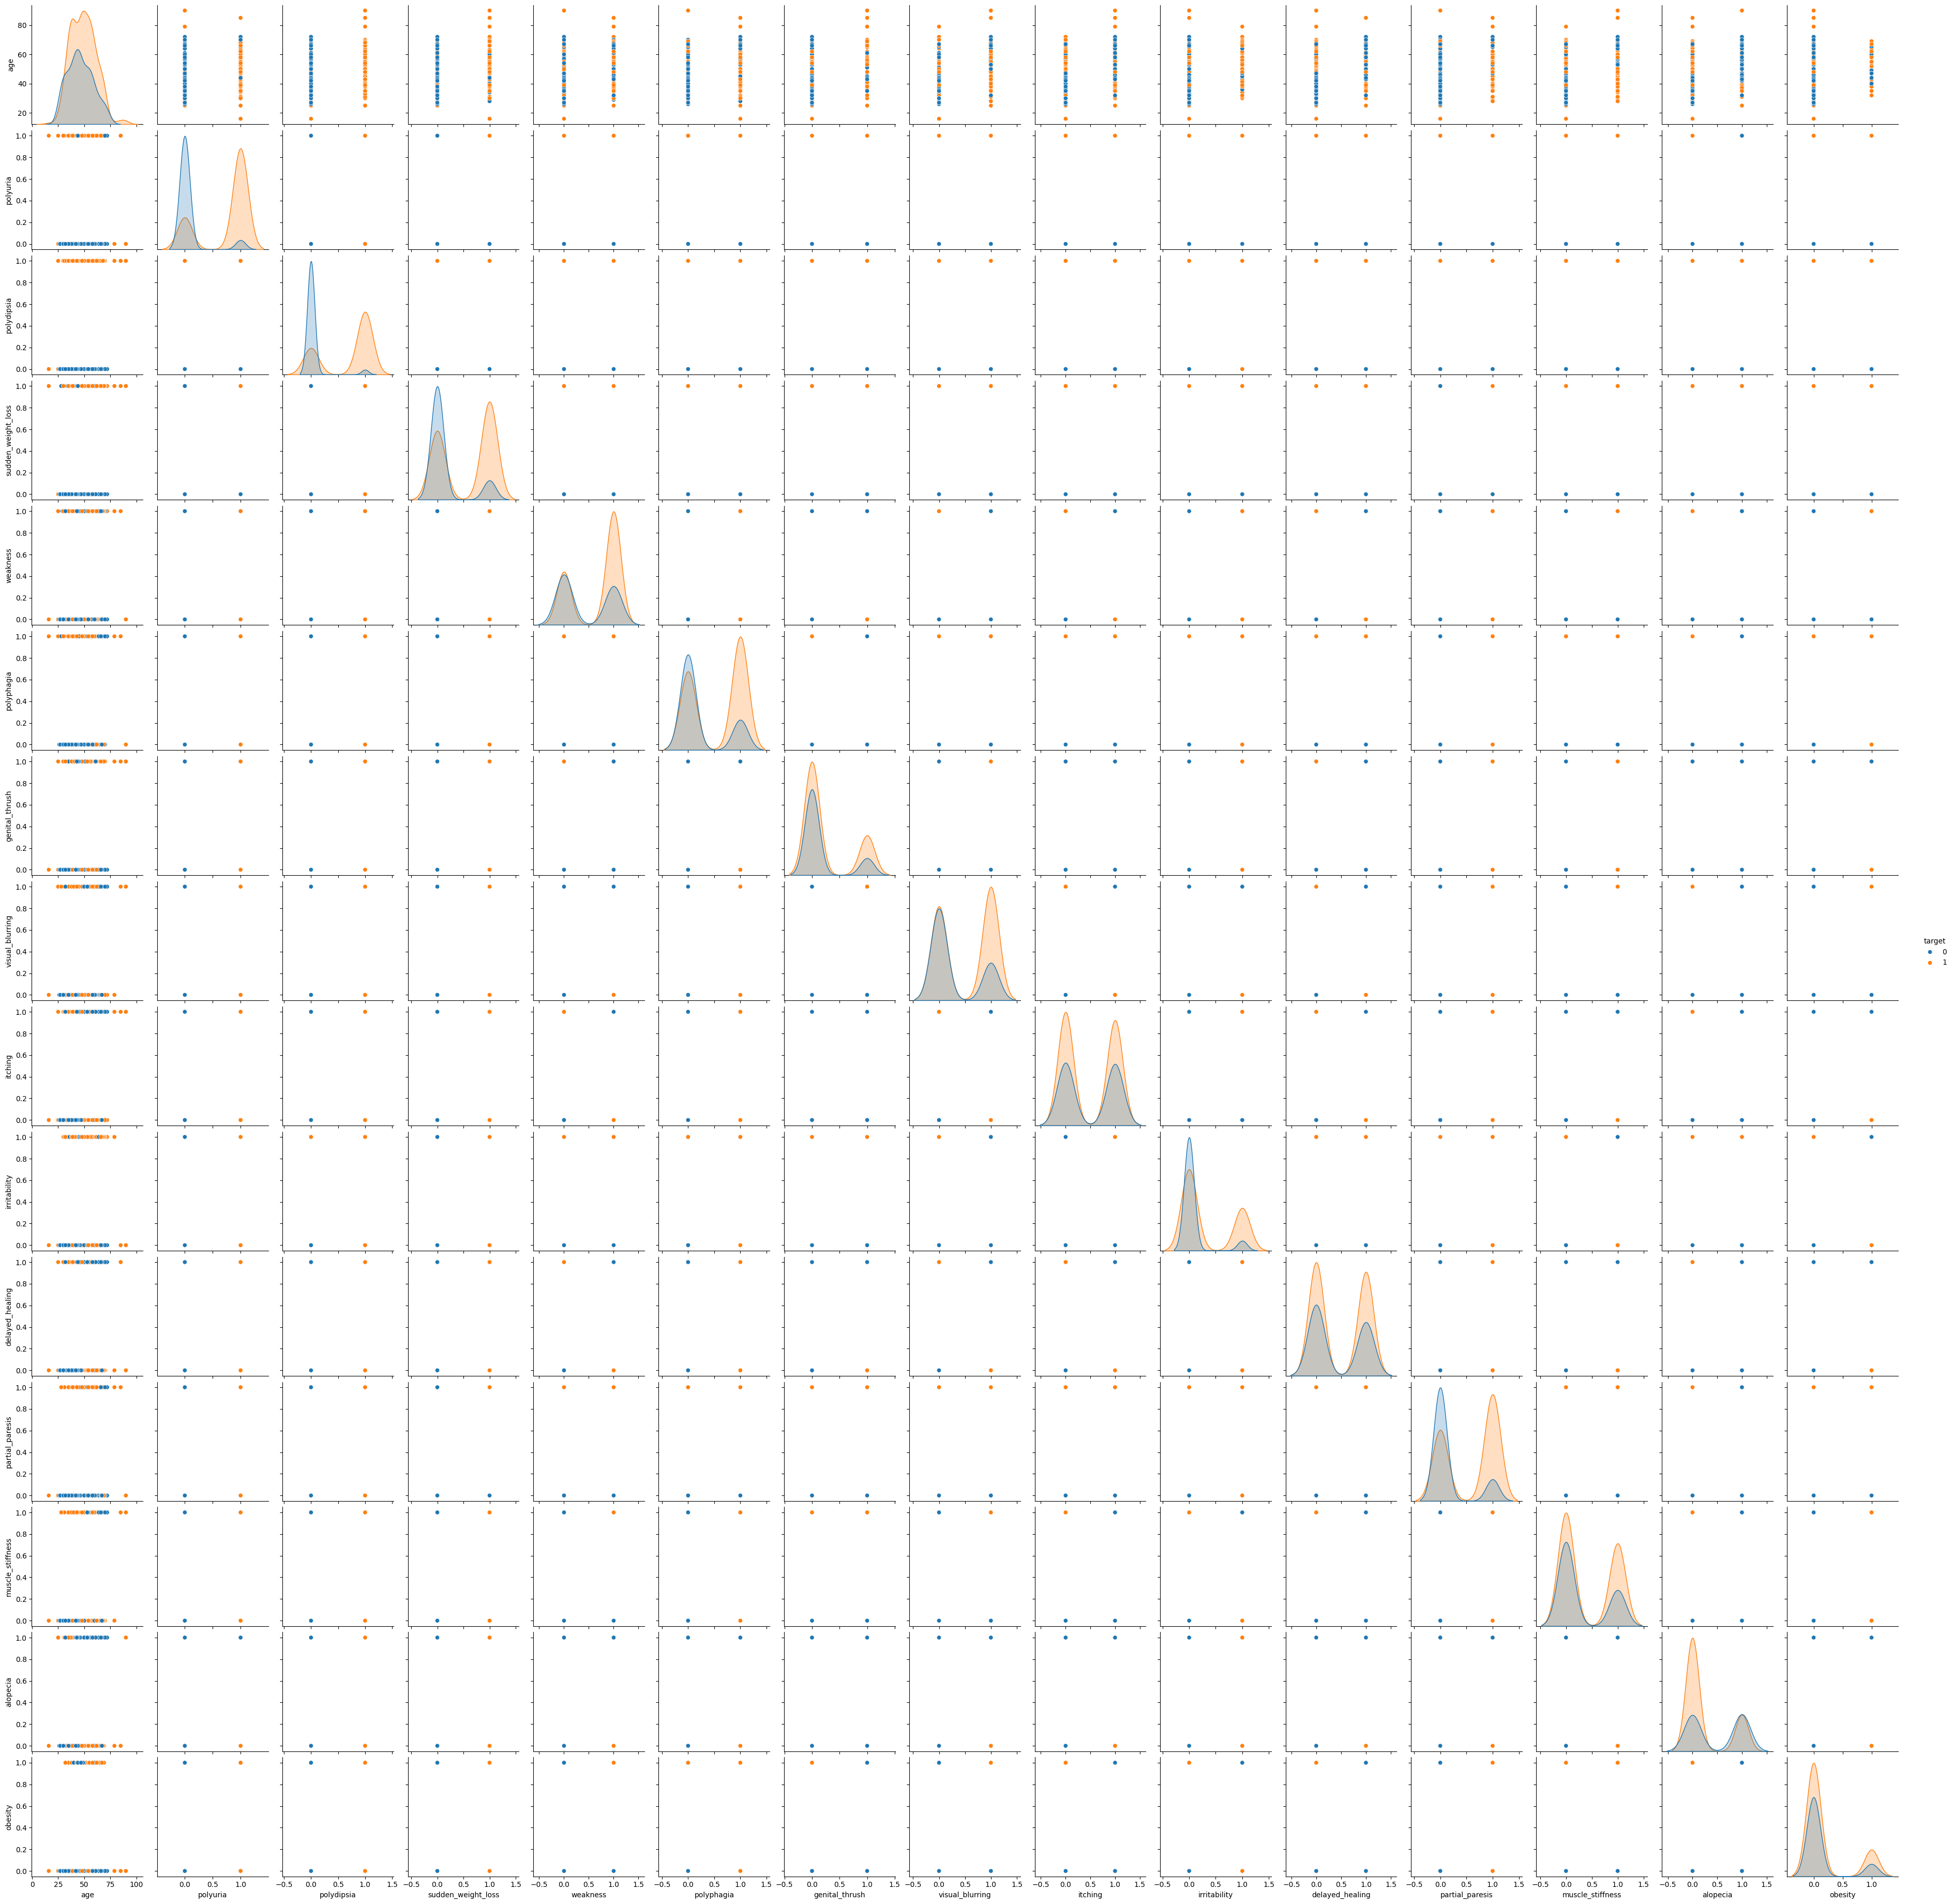

In [ ]:
sns.pairplot(diabetes_df, hue="target")
plt.show()

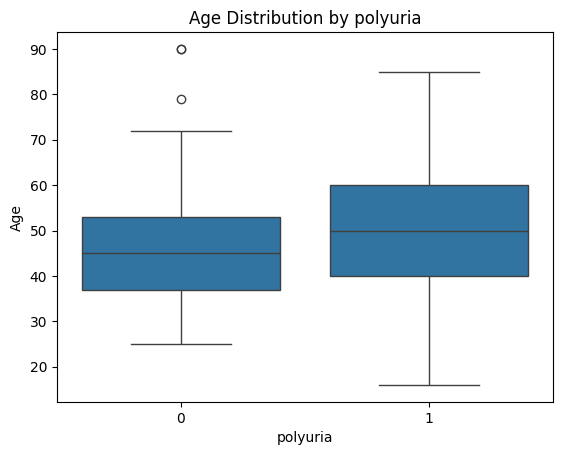

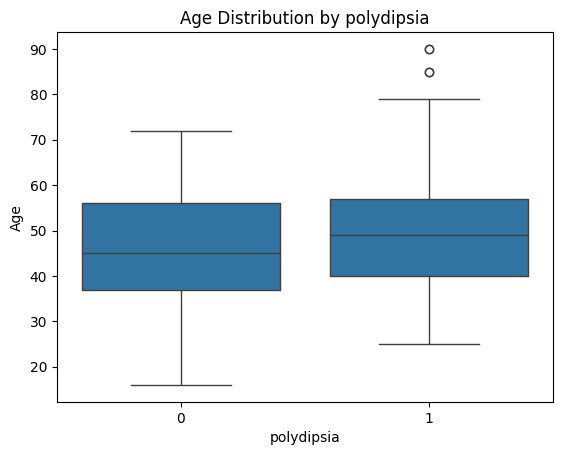

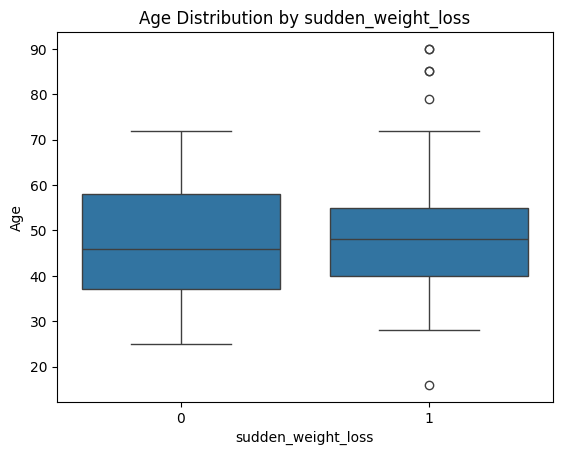

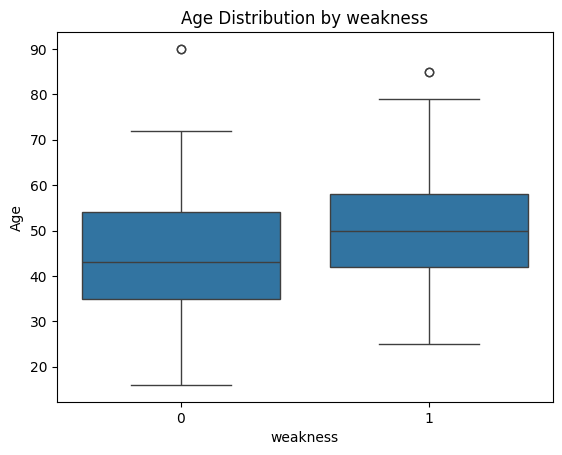

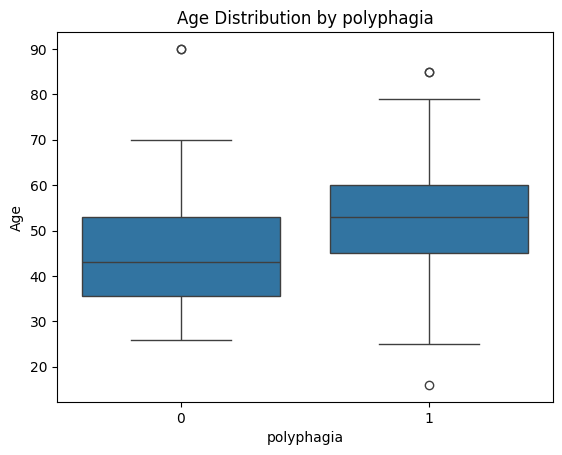

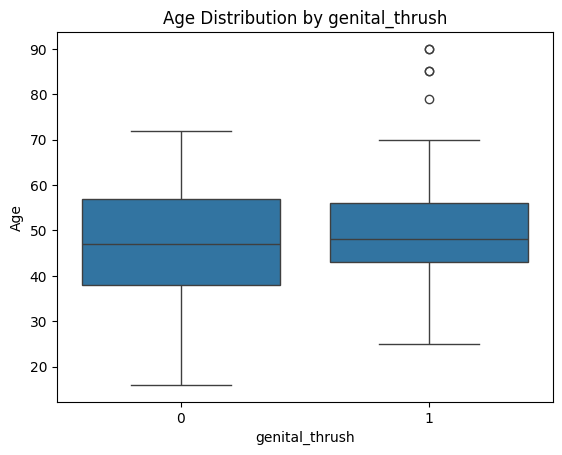

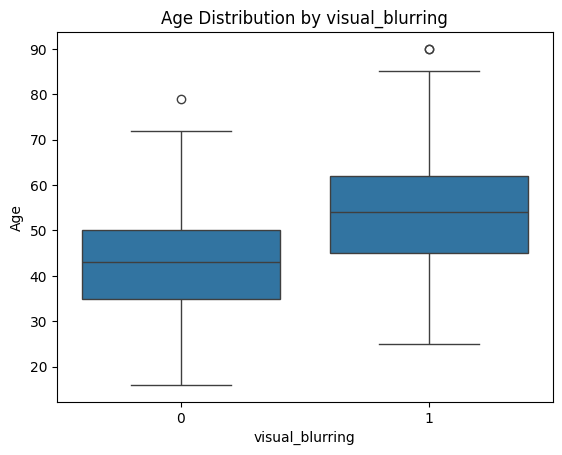

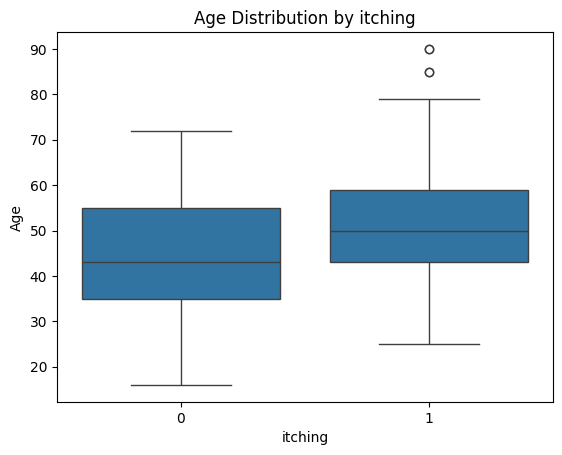

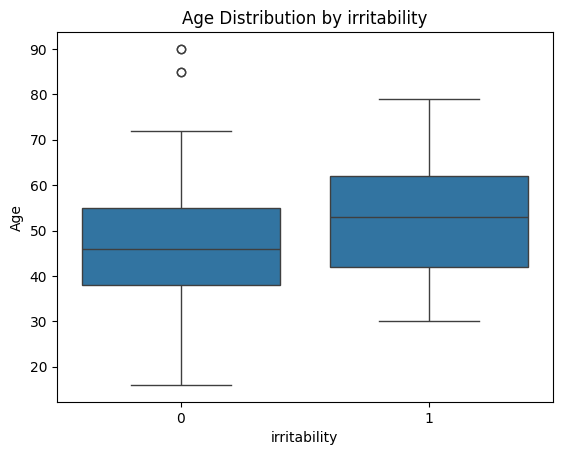

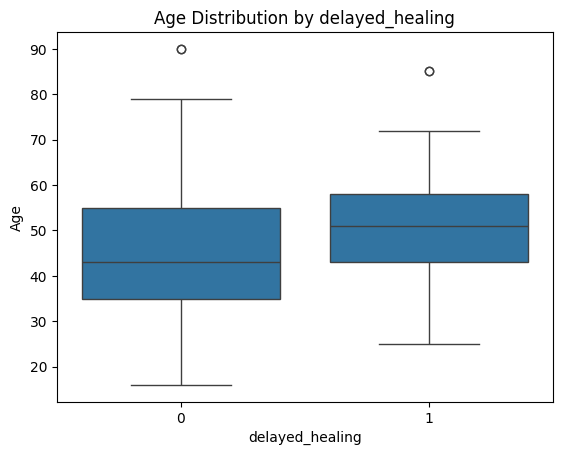

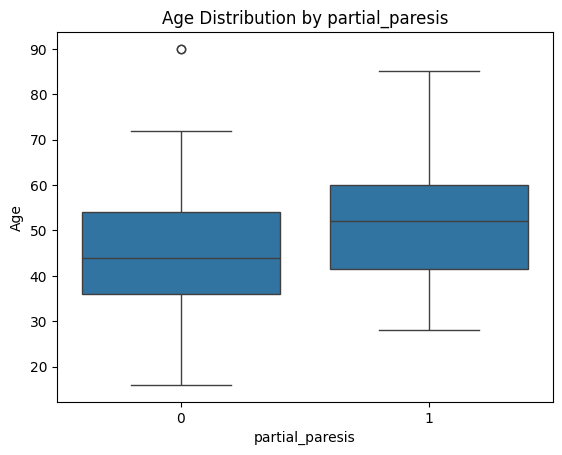

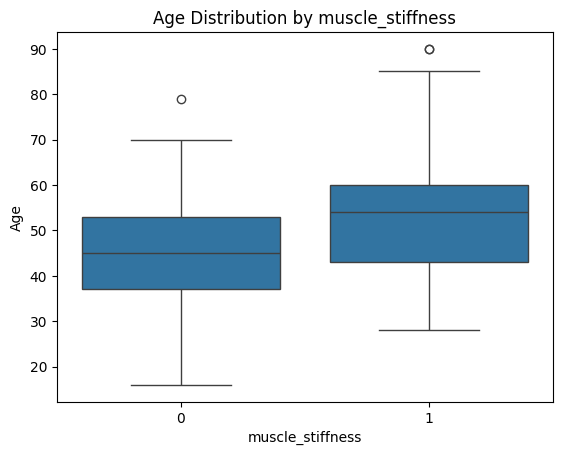

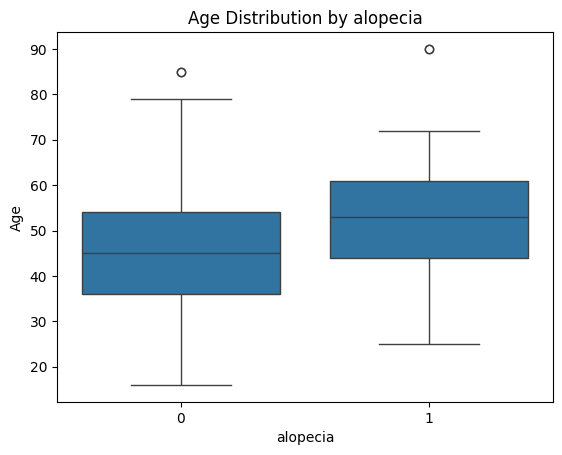

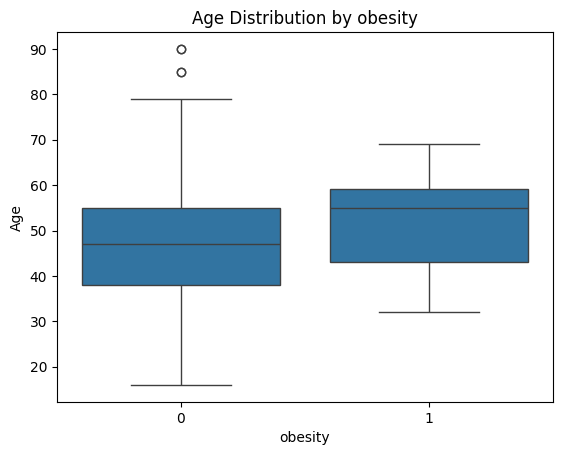

In [ ]:
features = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
                        'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                        'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']

for feature in features:
    sns.boxplot(x=feature, y='age', data=diabetes_df)
    plt.title(f'Age Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Age')
    plt.show()

**Insights**

There is an overall trend associated with age. As age is increased,
there is a higher chance of being diagnosed with diabetes. The orange curves highlight people who were diagnosed with diabetes based on those symptoms.

<Axes: >

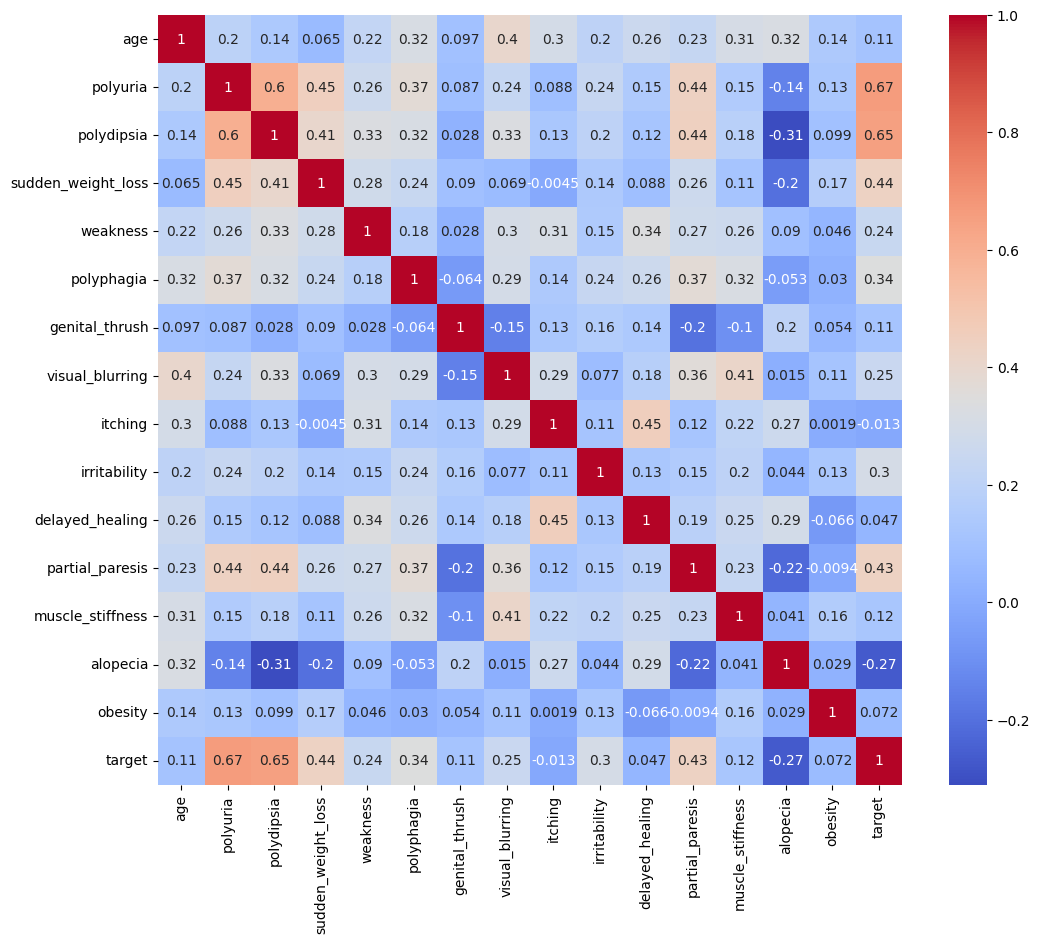

In [ ]:
corr_matrix = diabetes_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [ ]:
#Top 5 Features that should be learned by the model
import statsmodels.api as sm
from statsmodels.formula.api import ols

features = ['polyuria', 'polydipsia', 'sudden_weight_loss','polyphagia','partial_paresis']

for feature in features:
    model = ols(f'{feature} ~ target', data=diabetes_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA Results for {feature} (statsmodels):")
    print(anova_table)


ANOVA Results for polyuria (statsmodels):
             sum_sq     df          F        PR(>F)
target    57.645433    1.0  412.73841  6.384838e-68
Residual  72.346875  518.0        NaN           NaN
ANOVA Results for polydipsia (statsmodels):
             sum_sq     df           F        PR(>F)
target    54.121202    1.0  376.422649  1.964187e-63
Residual  74.476875  518.0         NaN           NaN
ANOVA Results for sudden_weight_loss (statsmodels):
              sum_sq     df           F        PR(>F)
target     24.099231    1.0  121.973731  1.307517e-25
Residual  102.345000  518.0         NaN           NaN
ANOVA Results for polyphagia (statsmodels):
              sum_sq     df          F        PR(>F)
target     15.130817    1.0  68.841759  9.295946e-16
Residual  113.851875  518.0        NaN           NaN
ANOVA Results for partial_paresis (statsmodels):
              sum_sq     df           F        PR(>F)
target     23.827692    1.0  119.046534  4.328222e-25
Residual  103.680000  518

# Models


**Feature Engineering & Selection**

In order for the model to interpret the data, the features need to be converted into numerical data. This is achieved through encoding, which makes sure the features can be predicted by the model. The filter method will be used to select the feature. For this dataset, the ANOVA test was use to determine whether the feature was correlated with a positive diagnosis of diabetes. The features that were selected was polyuria, polydipsia, sudden_weight_loss,
 polyphagia, partial_paresis. These 5 features were selected because they were the common symptoms that associated with a positive diagonis of diabetes.

**Model Tuning, Validation, and Evaluation**


For this data to work, classification algorithmns were selected because the model's goal was to predict whether a patient has diabetes or not. Since this is a binary classification problemm, logistic regression, random forest, k nearest neighbors, and SVC were algorithmns that was chosen. They would be a better fit for the data. Hyperparameter tuning process is method that tries all the different combination to make a model as accurate as possible. Random search was selected for this process because of how fast it can explore. K-fold cross validation was used to validate the models with 10 folds. Accuracy was used to evaluate the model since they all had identical test results. Logistics regession came out to be 0.8747. K nearest neighbors was 0.8605. Random forest was 0.8725. SVC was 0.8653. Based on the accuracy of the models, logistic outperformed the other models.


1. LogisticRegression(C=1.1, max_iter=4000, solver='saga')
2. KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, n_neighbors=6)
3. RandomForestClassifier(max_depth=8, max_leaf_nodes=4)
4. SVC(C=5, kernel='linear')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
top_5_features = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'partial_paresis']
X = diabetes_df[top_5_features]
y = diabetes_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param = {
    'C': [0.3, 0.7, 0.15, 1.1],
    'solver': ['saga'],
    'max_iter': [2000, 4000, 6000]
}

random_search = RandomizedSearchCV (
    LogisticRegression(),
    param,
    cv=5,
    n_jobs=-1,
    random_state=42

)

random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


LogisticRegression(C=1.1, max_iter=4000, solver='saga')


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
model = LogisticRegression(C=1.1, max_iter=4000, solver='saga')
model.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.87      0.93      0.90        67

    accuracy                           0.87       104
   macro avg       0.86      0.84      0.85       104
weighted avg       0.86      0.87      0.86       104



In [ ]:
param = {
    'n_neighbors': [2, 4, 6, 8, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60],
    'p': [1, 2],
    'metric': ['minkowski', 'manhattan']
}
random_search = RandomizedSearchCV (
    KNeighborsClassifier(),
    param,
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, n_neighbors=6)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, n_neighbors=6)
model.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        43
           1       0.80      0.93      0.86        61

    accuracy                           0.83       104
   macro avg       0.84      0.80      0.81       104
weighted avg       0.83      0.83      0.82       104



In [ ]:
param = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2, 4, 8],
    'max_leaf_nodes': [2, 4, 8],
}

random_search = RandomizedSearchCV (
    RandomForestClassifier(),
    param,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=8, max_features='log2', max_leaf_nodes=8,
                       n_estimators=300)


In [ ]:
model = RandomForestClassifier(max_depth=8, max_leaf_nodes=4)
model.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.87      0.93      0.90        67

    accuracy                           0.87       104
   macro avg       0.86      0.84      0.85       104
weighted avg       0.86      0.87      0.86       104



In [ ]:
param = {
    'C': [5, 20, 50, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid','precomputed'],
    'gamma': ['scale'],
}

random_search = RandomizedSearchCV (
    SVC(),
    param,
    cv=5,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


SVC(C=5, kernel='linear')


In [ ]:
model = SVC(C=5, kernel='linear')
model.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.87      0.93      0.90        67

    accuracy                           0.87       104
   macro avg       0.86      0.84      0.85       104
weighted avg       0.86      0.87      0.86       104



In [ ]:
top_5_features = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'partial_paresis']

X_train_top5 = X_train[top_5_features]

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC()
}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_top5, y_train, scoring='accuracy', cv=10)
    print(f'{name} Classifier with top 5 ANOVA features - Average accuracy Score: {scores.mean():.4f}')

Logistic Regression Classifier with top 5 ANOVA features - Average accuracy Score: 0.8747
K-NN Classifier with top 5 ANOVA features - Average accuracy Score: 0.8605
Random Forest Classifier with top 5 ANOVA features - Average accuracy Score: 0.8725
SVC Classifier with top 5 ANOVA features - Average accuracy Score: 0.8653


In [ ]:
class_proportions = diabetes_df.value_counts(normalize=True)
print(class_proportions)

age  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  genital_thrush  visual_blurring  itching  irritability  delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  target
30   0         0           0                   0         0           0               0                0        0             0                0                0                 0         0        0         0.030769
38   0         0           0                   0         0           0               0                0        0             0                0                0                 0         0        0         0.013462
53   0         0           0                   1         1           0               1                1        0             1                1                1                 1         0        0         0.013462
46   0         0           0                   1         0           0               0                1        0             1                0         

# Conclusion

**Key Findings**

Based on the exploratory data analysis, the features that were highly correlated with a risk of diabetes included polyuria, polydipsia, sudden_weight_loss, polyphagia, partial_paresis. The boxplot indicated that older individuals are more likely to have these symptoms. When comparing polyuria with polydipsia on a pairplot, polyuria had a stronger indicator of diabetes. Since the set of hyper parameters was the same results for the precision, recall, and F1-score, we wil compare the performance using k-cross validation. Logistics regession had the strongest performance of 0.8747.

**Problem resolution**

The model was effective in predicting whether a patient is at risk of developing diabetes. It showed a strong indicator across accuracy, precision, recall, and F1-score. This model will be useful in a healthcare setting because doctors can easier identify a patient associated with diabetes. They can better treat the patient. This wil reduce a patient's chances of developing a severe case of diabetes.

**Deployment**

The results could be used in hospitals and clinicsm in the real world. Humans would need to review and make their own decisions because a patient might not have diabetes even if these symptoms are present. The best time to update the data would be every few months. This would allow for the model to be used on a majority of patients in that city so they can see if they need to re-train it or not.

**Improvements**

To improve the current model, I would expand the dateset to include different populations instead of just a hospital in Bangladesh. I would also try different models to see how that would affect the data.



**Work Cited**

 https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

 https://idf.org/news/diabetes-now-affects-one-in-10-adults-worldwide/
